In [17]:
#必要なライブラリを読み込む
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train1.csvを読み込む

In [18]:
df = pd.read_csv('train1.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#老人の子供,老人という概念を導入してみる
def male_female_child_elderly(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    elif age > 60:
        return 'elderly'
    else:
        return sex

#applyで新しく定義した子供という概念を適用させる
df['person'] = df[['Age','Sex']].apply(male_female_child_elderly, axis=1)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


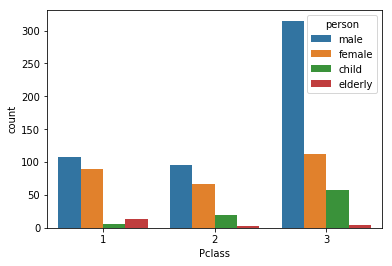

In [22]:
import seaborn as sns
sns.countplot('Pclass',data=df,hue='person')

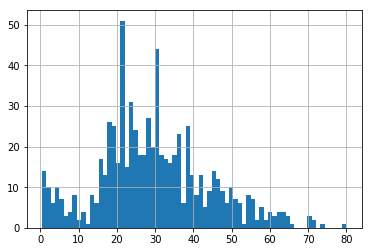

In [23]:
#年齢のヒストグラム。
df['Age'].hist (bins=70)

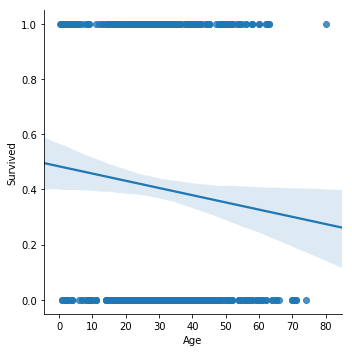

In [24]:
#生存率と年齢というのをプロットしてみる
#lmplotで図示できる
sns.lmplot('Age','Survived',data=df)

In [25]:
# クラスラベルと整数を対応させるディクショナリを生成
sex_mapping = {'male': 0, 'female': 1}
sex_mapping
# マッピングの実行
df['Sex'] = df['Sex'].map(sex_mapping)
embarked_dm = pd.get_dummies(df['Embarked'])
df = pd.concat((df,embarked_dm),axis=1)
df = df.drop('Embarked',axis=1)

In [26]:
person_dm = pd.get_dummies(df['person'])
df = pd.concat((df,person_dm),axis=1)
df = df.drop('person',axis=1)

In [27]:
#データの欠損値の確認します
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
C                0
Q                0
S                0
child            0
elderly          0
female           0
male             0
dtype: int64

In [28]:
#関係ないデータと欠損が大きいデータを消去
df = df.drop(['Name','Ticket','Cabin'],axis=1)

In [29]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,child,elderly,female,male
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148,-0.017941,-0.008323,-0.034786,0.045525
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660,0.136107,-0.051224,0.498859,-0.527809
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720,0.121920,-0.136667,-0.171967,0.131020
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.082853,0.074115,-0.125722,0.111141,-0.071958,0.889091,-0.869335
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523,-0.582875,0.446160,0.084692,0.142508
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941,0.352437,-0.055819,0.048483,-0.235149
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036,0.351481,-0.021502,0.154119,-0.343579
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603,0.003753,0.029368,0.188351,-0.186539
C,-0.001205,0.168240,-0.243292,0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359,0.023201,-0.021229,0.059238,-0.062058
Q,-0.033606,0.003650,0.221009,0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624,-0.029861,0.002542,0.103120,-0.079066


In [30]:
#相関係数0.1以上のものだけを用いるそれ以外はgoodby
df = df.drop(['Q','Parch','SibSp','Age','PassengerId','elderly'],axis=1)

In [31]:
df_y = df['Survived']
y_4 = np.array(df_y) 
y_4[:5]

array([0, 1, 1, 1, 0])

In [32]:
df_X = df.drop("Survived", axis=1)
X_4 = np.array(df_X) 
X_4[:5]

array([[  3.    ,   0.    ,   7.25  ,   0.    ,   1.    ,   0.    ,
          0.    ,   1.    ],
       [  1.    ,   1.    ,  71.2833,   1.    ,   0.    ,   0.    ,
          1.    ,   0.    ],
       [  3.    ,   1.    ,   7.925 ,   0.    ,   1.    ,   0.    ,
          1.    ,   0.    ],
       [  1.    ,   1.    ,  53.1   ,   0.    ,   1.    ,   0.    ,
          1.    ,   0.    ],
       [  3.    ,   0.    ,   8.05  ,   0.    ,   1.    ,   0.    ,
          0.    ,   1.    ]])

In [33]:
#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_4)
X_4_std = scaler.transform(X_4)

In [34]:
#ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X_4_train,X_4_test,y_4_train,y_4_test = train_test_split(X_4_std,y_4,test_size=0.3,random_state=0)

In [35]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [36]:
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [37]:
# GridSearchCVのインスタンスを生成
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [38]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_svc.fit(X_4_train, y_4_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
# test精度の平均が最も高かった組み合わせを出力
gs_svc.best_params_

{'C': 10, 'gamma': 0.1}

In [40]:
# ホールド・アウト法によるtest精度を出力
gs_svc.score(X_4_train, y_4_train)

0.8346709470304976